In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/black-friday-sales-eda/train.csv


In [2]:
df = pd.read_csv('/kaggle/input/black-friday-sales-eda/train.csv')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [5]:
del df['Product_Category_2']
del df['Product_Category_3']

In [6]:
for i in df.columns:
    print(df[i].nunique(),"\t:",i)

5891 	: User_ID
3631 	: Product_ID
2 	: Gender
7 	: Age
21 	: Occupation
3 	: City_Category
5 	: Stay_In_Current_City_Years
2 	: Marital_Status
20 	: Product_Category_1
18105 	: Purchase


In [7]:
lst = []
for i in range(len(df)):
    lst.append(df['Gender'][i]+"_"+str(df['Marital_Status'][i]))
df['Combined'] = lst

In [8]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Combined
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


## Analysing Gender Column :

<AxesSubplot:title={'center':'Total number of purchases'}, ylabel='None'>

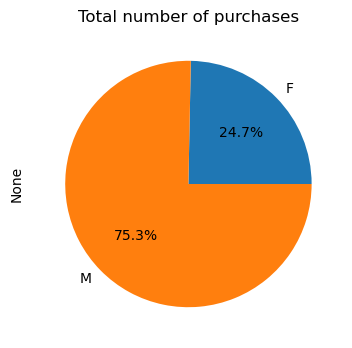

In [9]:
df.groupby('Gender').size().plot(kind='pie',figsize=(5,4),autopct='%0.1f%%',title='Total number of purchases')

It is known from the pie chart that the males are purchasing more number of products.

<AxesSubplot:title={'center':'Purchase amount distribution'}, ylabel='Purchase'>

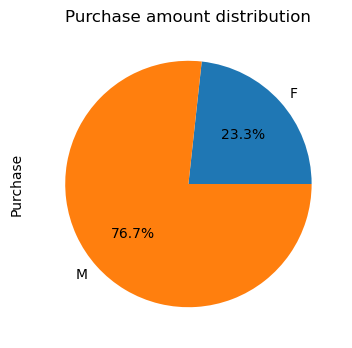

In [10]:
df.groupby('Gender').sum()['Purchase'].plot(kind='pie',autopct='%0.1f%%',title='Purchase amount distribution',figsize=(4,4))

<AxesSubplot:title={'center':'Purchase amount mean distribution'}, ylabel='Purchase'>

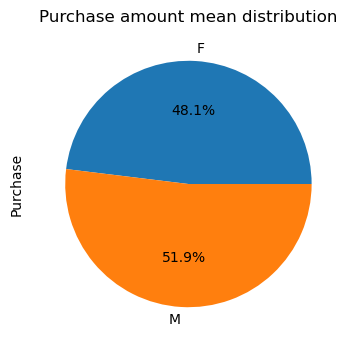

In [11]:
df.groupby('Gender').mean()['Purchase'].plot(kind='pie',
                                             autopct='%0.1f%%',
                                             title='Purchase amount mean distribution',
                                             figsize=(4,4))

Though the number of purchases are made by males, the average money spent on each procuct by both males and females is same.

## Analysing Age Column :

<AxesSubplot:xlabel='Age'>

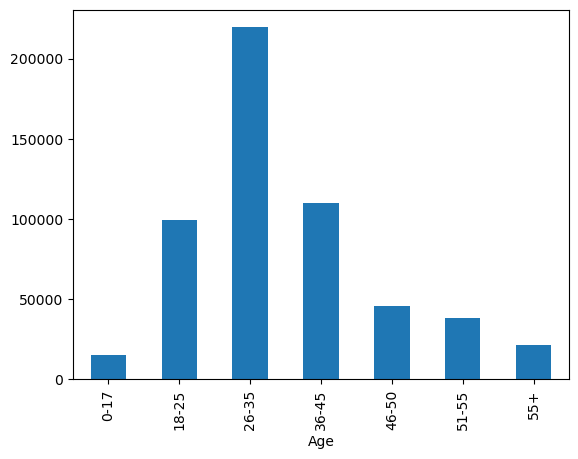

In [12]:
df.groupby('Age').size().plot(kind = 'bar')

<AxesSubplot:title={'center':'Number of unique products per age group'}, xlabel='Age'>

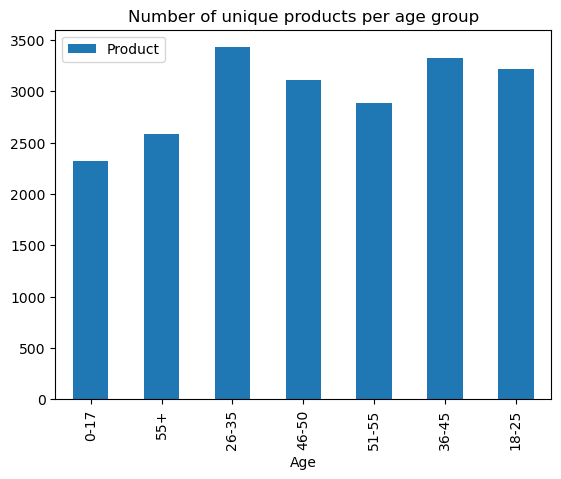

In [13]:
l1 = []
for i in df['Age'].unique():
    l1.append([i,df[df['Age']== i]['Product_ID'].nunique()])
data=pd.DataFrame(l1,columns = ['Age','Product'])
data.plot.bar(x = 'Age',title = 'Number of unique products per age group')    

<AxesSubplot:title={'center':'Amount spent distribution'}, xlabel='Age'>

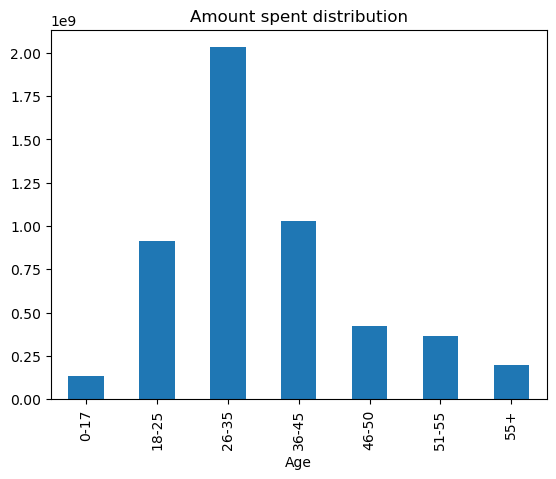

In [14]:
df.groupby('Age').sum()['Purchase'].plot(kind = 'bar',
                                         title = 'Amount spent distribution')

<AxesSubplot:title={'center':'Average amount spent distribution'}, xlabel='Age'>

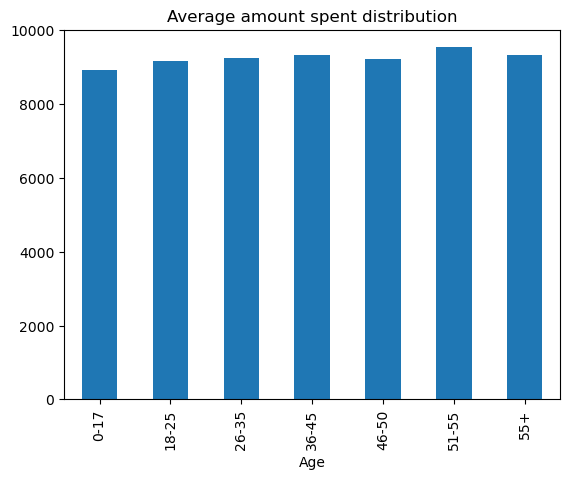

In [15]:
df.groupby('Age').mean()['Purchase'].plot(kind = 'bar',
                                         title = 'Average amount spent distribution')

<AxesSubplot:xlabel='Age'>

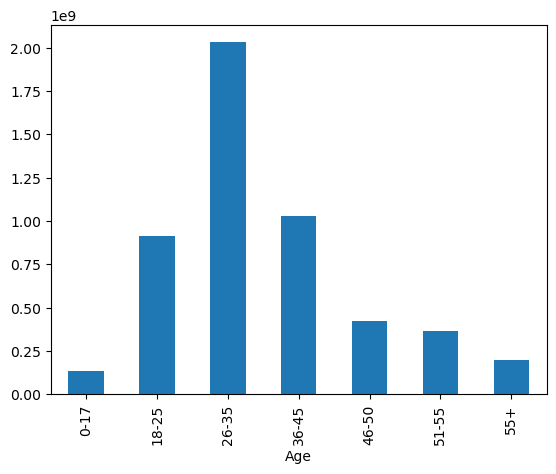

In [16]:
df.groupby('Age').sum()['Purchase'].plot(kind = 'bar')

* The number of purchases and the total money spent is more for the age groups between 18-45 with 26-35 being the most. 
* Also the number of unique products available are more in the same age groups.
* The average money spent per product is more or less same for all the age groups.

## Analysing Marital Status Column :

<AxesSubplot:title={'center':'Marital status distribution'}, ylabel='None'>

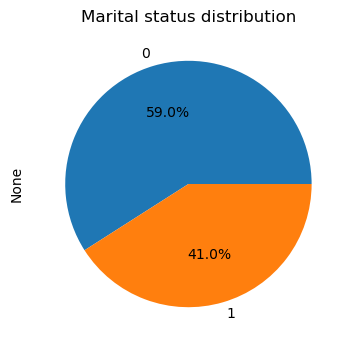

In [17]:
df.groupby('Marital_Status').size().plot(kind = 'pie',
                                        autopct = '%0.1f%%',
                                        figsize = (4,4),
                                        title = 'Marital status distribution')

<AxesSubplot:title={'center':'Money spent'}, ylabel='Purchase'>

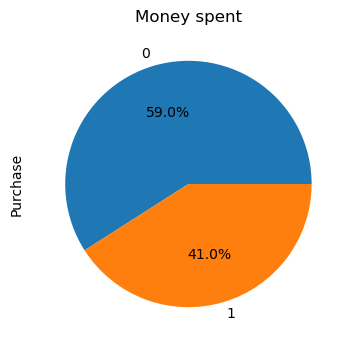

In [18]:
df.groupby('Marital_Status').sum()['Purchase'].plot(kind = 'pie',
                                                   autopct = '%0.1f%%',
                                                   figsize = (4,4),
                                                   title = 'Money spent')

Inference :
More than 50% people are unmarried and 60% of the revenue comes from unmarried people.

## Further analysis :

<AxesSubplot:xlabel='Age', ylabel='count'>

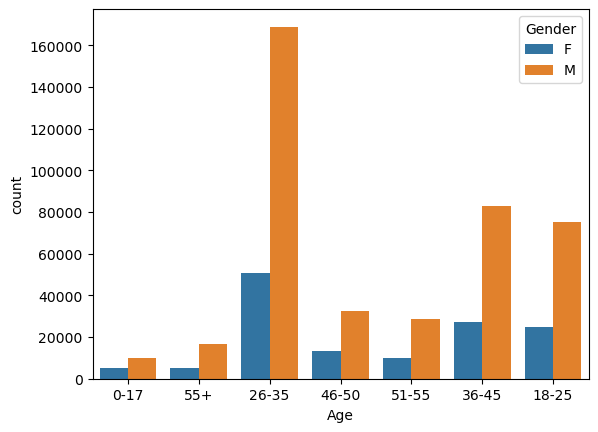

In [19]:
import seaborn as sns
sns.countplot(x = 'Age',hue = 'Gender',data = df)

Males of age between 18-45 are purchasing more items.

<AxesSubplot:xlabel='City_Category', ylabel='count'>

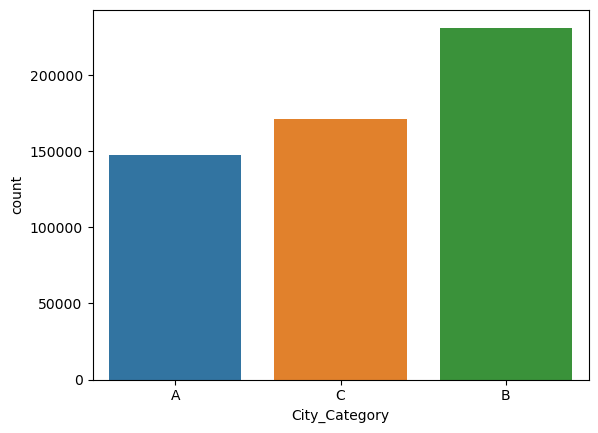

In [20]:
sns.countplot(x = 'City_Category', data = df)

<AxesSubplot:xlabel='City_Category', ylabel='count'>

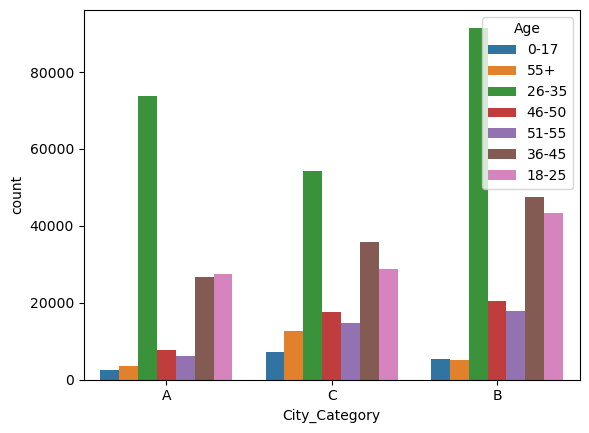

In [21]:
sns.countplot(x = 'City_Category', hue = 'Age', data = df)

People form City B are purchasing more items.

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

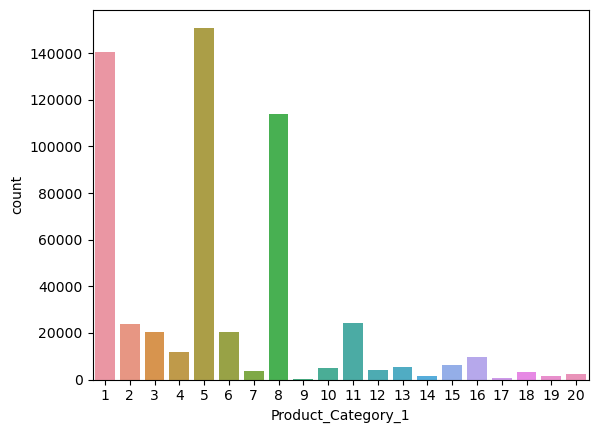

In [22]:
sns.countplot(x = 'Product_Category_1', data = df)

<AxesSubplot:xlabel='Product_Category_1'>

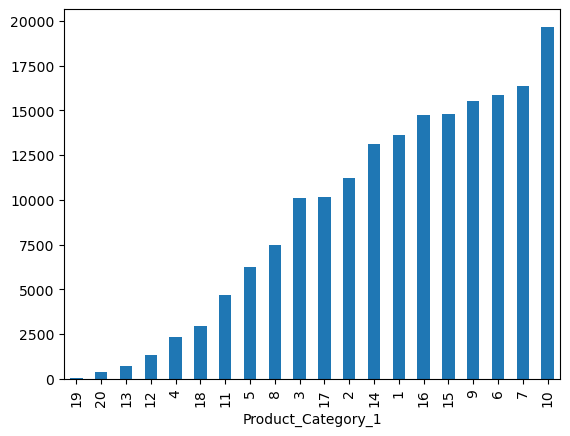

In [23]:
df.groupby('Product_Category_1').mean()['Purchase'].sort_values().plot(kind = 'bar')

* Products of category [5,1,8] are being purchased more.
* Products of category [10,7,6] are most expensive ones.

<AxesSubplot:xlabel='Occupation', ylabel='count'>

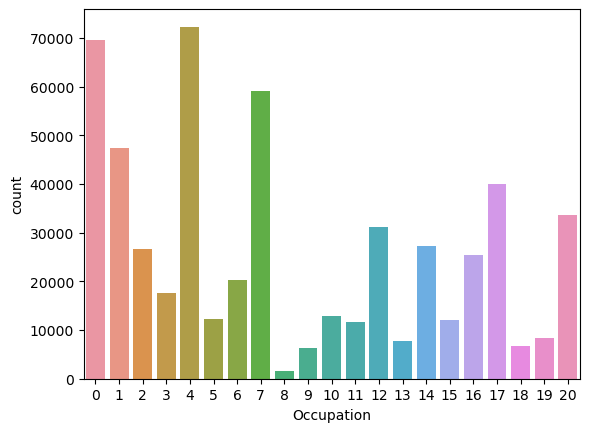

In [24]:
sns.countplot(x = 'Occupation', data = df)

<AxesSubplot:xlabel='Occupation'>

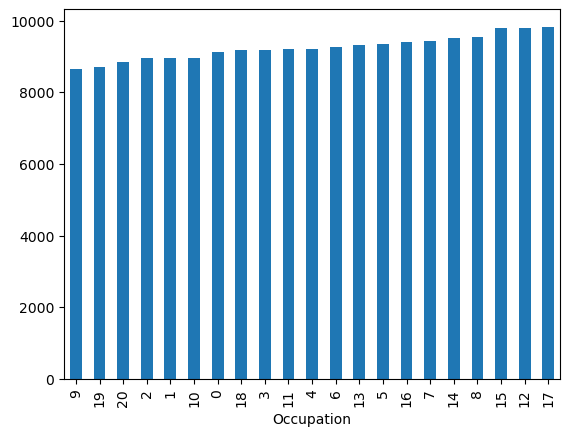

In [25]:
df.groupby('Occupation').mean()['Purchase'].sort_values().plot(kind = 'bar')

People with occupations [4,0,7] are purchasing more items and [17,12,15] are purchasing expensive items

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

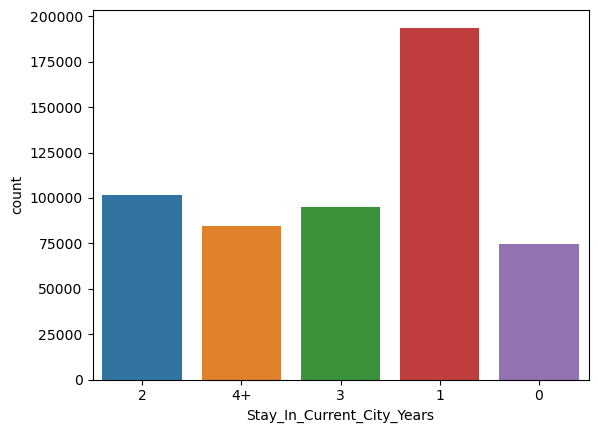

In [26]:
sns.countplot(x = 'Stay_In_Current_City_Years', data = df)

<AxesSubplot:xlabel='Stay_In_Current_City_Years'>

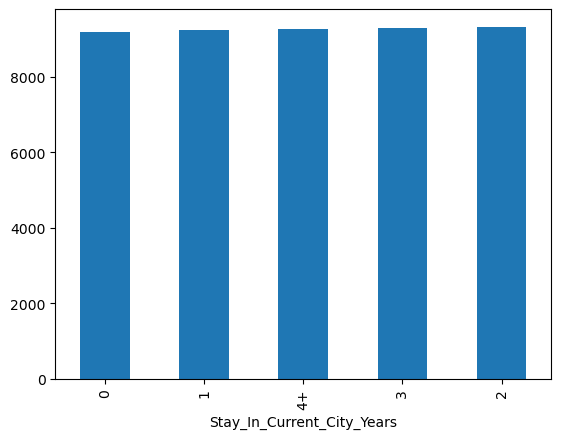

In [27]:
df.groupby('Stay_In_Current_City_Years').mean()['Purchase'].sort_values().plot(kind = 'bar')

People who stayed for 1 year are purchasing more items. And everyone are purchasing more or less same price items.

<AxesSubplot:xlabel='Product_ID'>

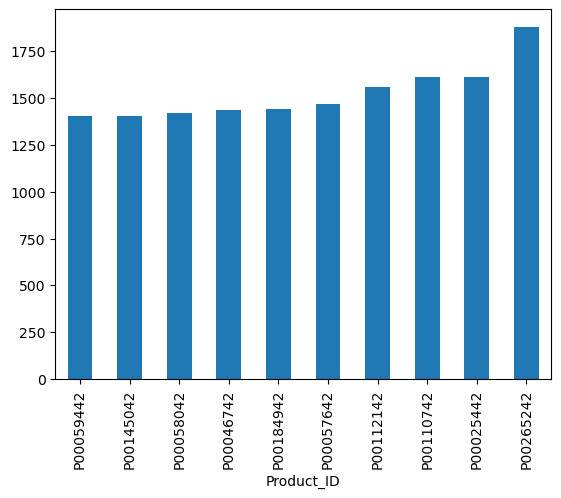

In [28]:
df.groupby('Product_ID').size().nlargest(10).sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Product_ID'>

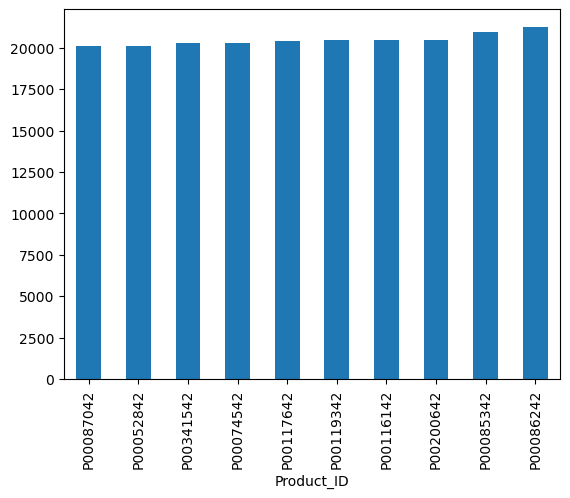

In [29]:
df.groupby('Product_ID').mean()['Purchase'].nlargest(10).sort_values().plot(kind = 'bar')

Product with ids [P00265242, P00110742, P00025442] are being purchased more and those with ids [P00086242,P00085342,P00200642] are the expensive ones compared to others.

## Multi Variate Analysis :

<AxesSubplot:xlabel='Combined', ylabel='count'>

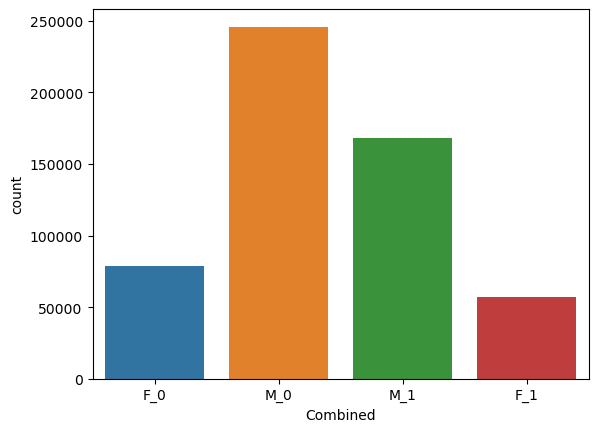

In [30]:
sns.countplot(x = df['Combined'])

<AxesSubplot:xlabel='Age', ylabel='count'>

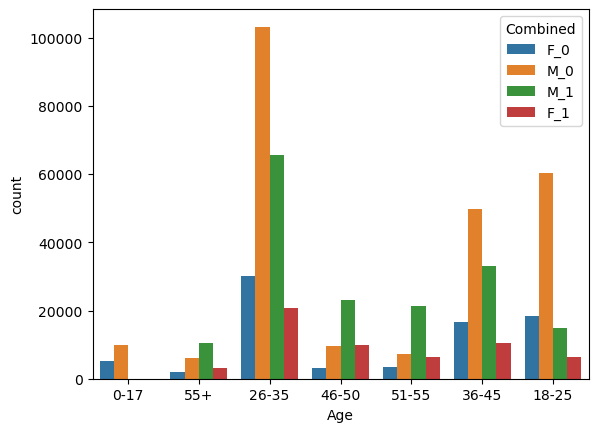

In [31]:
sns.countplot(x = df['Age'],hue = df['Combined'])

<AxesSubplot:xlabel='City_Category', ylabel='count'>

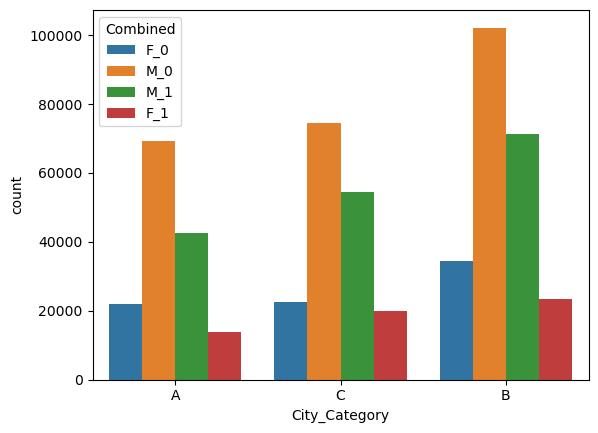

In [32]:
sns.countplot(x = df['City_Category'],hue = df['Combined'])

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

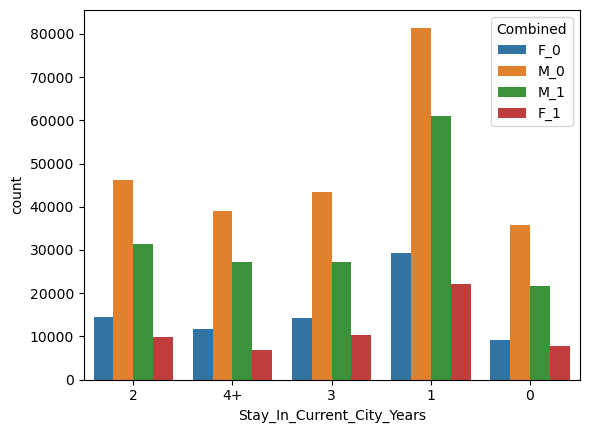

In [33]:
sns.countplot(x = df['Stay_In_Current_City_Years'],hue = df['Combined'])

<AxesSubplot:xlabel='Occupation', ylabel='count'>

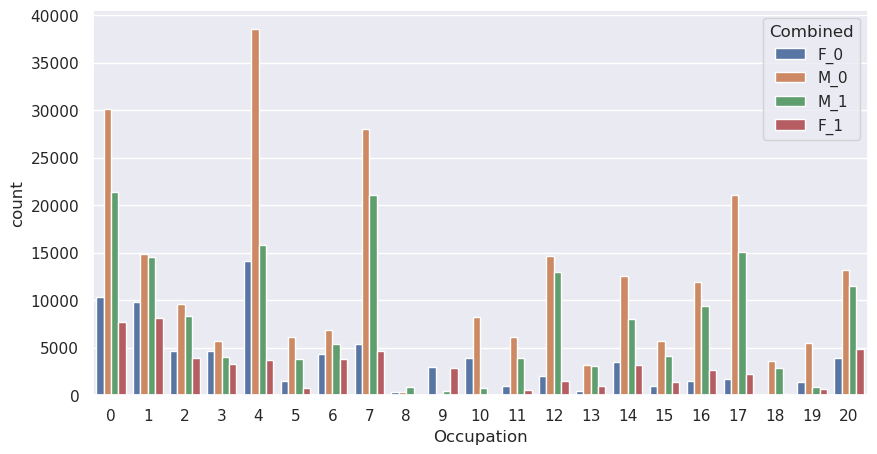

In [34]:
sns.set(rc = {'figure.figsize' : (10,5)})
sns.countplot(x = df['Occupation'],hue = df['Combined'])

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

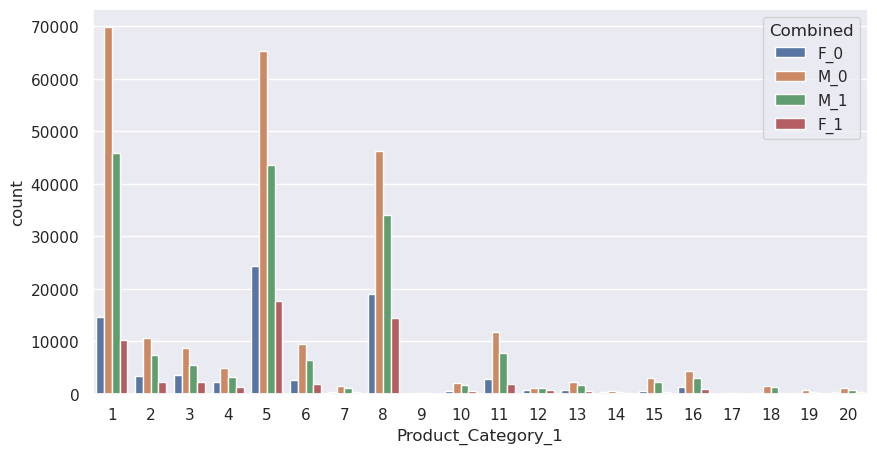

In [35]:
sns.countplot(x = df['Product_Category_1'],hue = df['Combined'])

## Conclusions :

#### Target audience:

* Males of age between 18-45 are purchasing more number of products.

* Though the more number of purchases are made by males, the average money spent on each procuct by both males and females is same.

* The number of purchases and the total money spent is more for the age groups between 18-45 with 26-35 being the most. Also the number of unique products available are more in the same age groups. The average money spent per product is more or less same for all the age groups.

* More than 50% people are unmarried and 60% of the revenue comes from unmarried people.

* People from City category B.

* People with occupations [4,0,7] are purchasing more items and [17,12,15] are purchasing expensive items.

* People who stayed for 1 year are purchasing more items. And everyone are purchasing more or less same price items.

* Products of category [5,1,8] are being purchased more. Products of category [10,7,6] are most expensive ones.

* Product with ids [P00265242, P00110742, P00025442] are being purchased more and those with ids [P00086242,P00085342,P00200642] are the expensive ones compared to others.